In [1]:
import pandas as pd
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [2]:
datas = data[data["Unit_x"] == "tonnes"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item_x"] == "Rice"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas[datas["Item_y"] == "Pesticides (total)"]
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Element_y", axis=1)
datas = datas.drop("Element_x", axis=1)
datas = datas.drop("Unit_x", axis=1)


In [3]:
datas.dtypes

Year                  int64
Area                 object
avg_temp            float64
yield_amound        float64
pesticide_amound    float64
dtype: object

In [4]:
from sklearn.preprocessing import OneHotEncoder
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)


Linear Regression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
# Extract features (X) 
# target variable (y)
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 55470910807040.9


In [6]:
import seaborn as sns

<Axes: xlabel='yield_amound'>

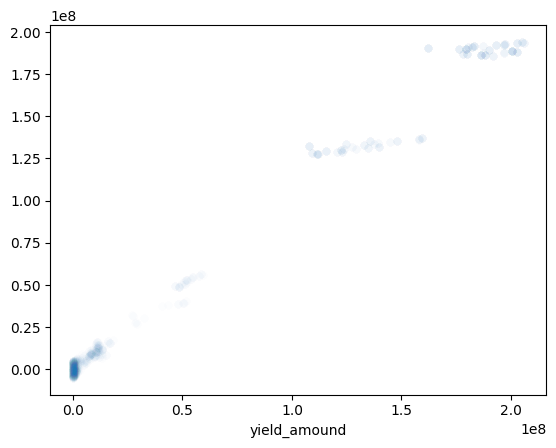

In [7]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

<Axes: xlabel='yield_amound', ylabel='Count'>

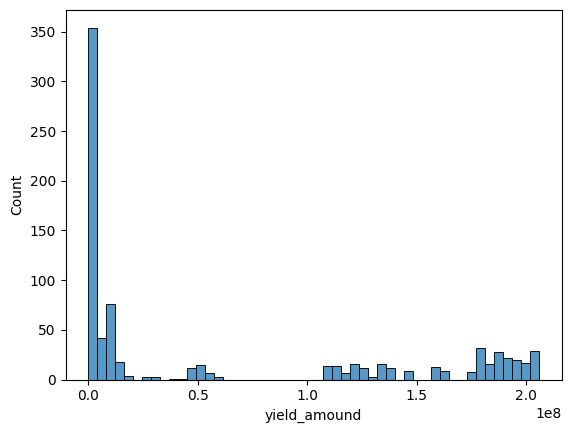

In [8]:
sns.histplot( data= y_test, bins=50)

<Axes: ylabel='Count'>

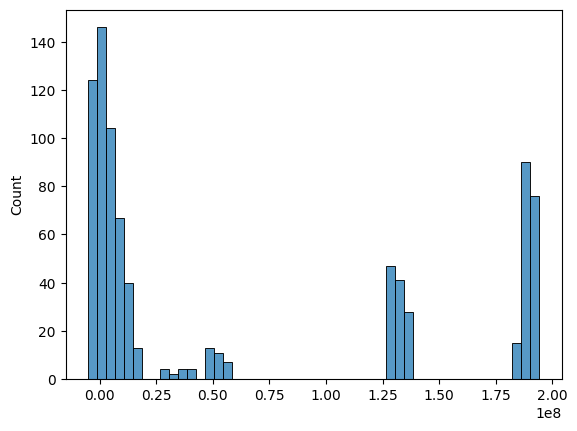

In [9]:
sns.histplot( data= y_pred, bins=50)

Lasso

In [10]:
from sklearn.linear_model import Lasso

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(alpha=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 55465742663540.0


<Axes: xlabel='yield_amound'>

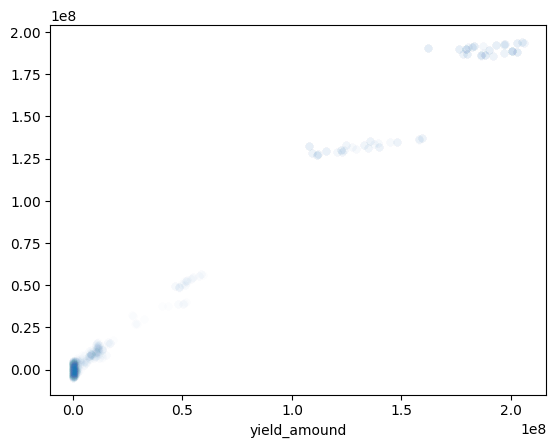

In [11]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

Gradiant Boosting Regressor 

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 8830994960260.73


<Axes: xlabel='yield_amound'>

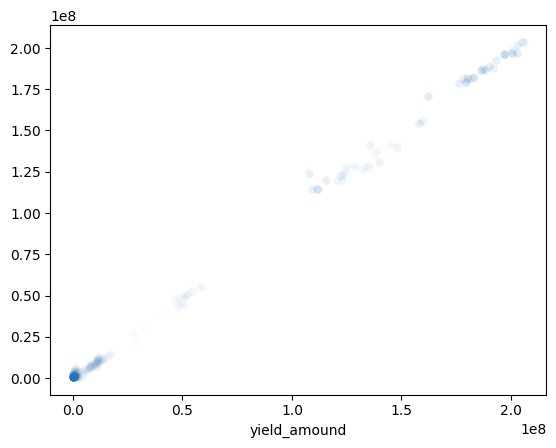

In [13]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)

Random forest regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 68803215594.30077


<Axes: xlabel='yield_amound'>

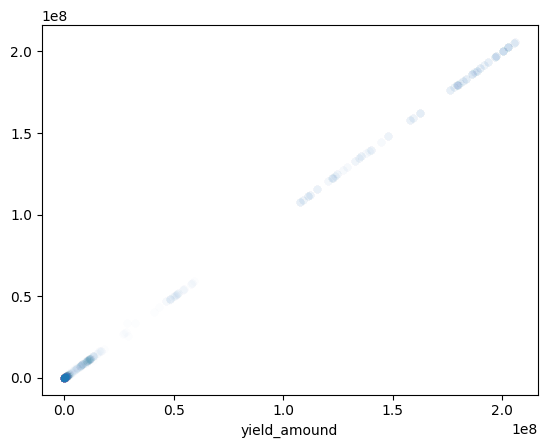

In [15]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.01)